<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/basic/11_differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

#수치미분 (numerical differentiation)

잘못된 미분 함수
$$f'(x)\ = {f(x)-f(x-h)\over h}, h=1e-50$$

h값에서 문제가 생긴다
h값이 지나치게 작음 (프로그램에서 처리 곤란)

#수치 미분의 함수의 표현 

$$f'(x)= {f(x+h)-f(x-h)\over 2h}, h= 0.0001 $$

이렇게 하면 에러보정을 위해 사용되고
h값을 컴퓨터에서 연산 가능한 정도로 실행함

In [49]:
def numerical_diff_nu(f,x):
  h=1e-50
  return (f(x+h)-f(x))/h

In [50]:
def numerical_diff(f,x):
  h=1e-4
  return (f(x+h)-f(x-h))/(2*h)

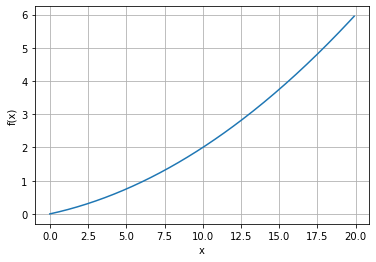

In [51]:
def function(x):
  return 0.01*x**2+0.1*x
  # 미분시 0.02*(x)+0.1

x=np.arange(0,20,0.1)
y=function(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.grid()
plt.show()

In [52]:
 # 미분시 0.02*(x)+0.1

g1=numerical_diff(function,5)
g2=numerical_diff(function,10)
print(g1,g2)
#x=5 f'(5)= 0.2 / f'(10)= 0.3

g3=numerical_diff_nu(function,5)
g4=numerical_diff_nu(function,10)
print(g3,g4)
#너무 작은 값은 연산하지 못하여서 값이 나오지 않는다
#대략 4~5번째 자리까지 한다라고 생각한다

0.1999999999990898 0.2999999999986347
0.0 0.0


#편미분 (partial derivative)
###ex)
$$ f(x,y)= x^2+y^2 $$

$$ {df(x,y)\over dx}=f'(x,y)_x=2x $$ 
$${df(x,y)\over dy}=f'(x,y)_y=2y $$

각각 변수에 대해 미분이 가능 한 것

최소값을 위해 미분을 알아야한다


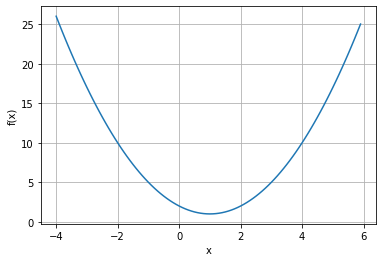

In [53]:
def fun(x):
  return x**2-2*x+2

x=np.arange(-4,6,0.1)
y=fun(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.grid()
plt.show()

#경사 하강법 경사 상승법 등등...

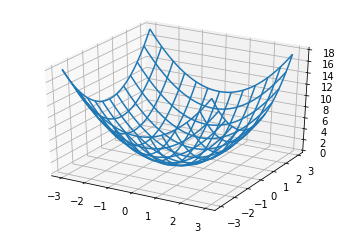

In [54]:
def function_2(x):
  return x[0]**2+x[1]**2

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

X=np.arange(-3.0,3.0,0.05)
Y=np.arange(-3.0,3.0,0.05)
X,Y=np.meshgrid(X,Y)
Z=X**2+Y**2
ax.plot_wireframe(X,Y,Z,rstride=10,cstride=10)
plt.show()

위에식을 

In [55]:
def function_tmp1(x0):
  return x0**2+4.0**2

fx_dx=numerical_diff(function_tmp1,3.0)
print(fx_dx)

def function_tmp2(x1):
  return 3.0**2+x1**2

fy_dy=numerical_diff(function_tmp2,4.0)
print(fy_dy)

6.00000000000378
7.999999999999119


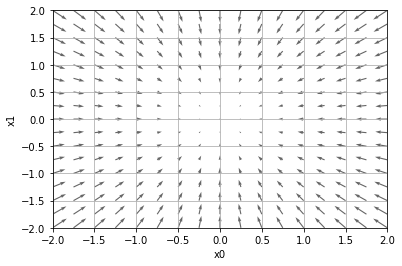

In [56]:
##### 이 코드 소스는 분석 하지 않았기에 따로 확인 하여 혼자 공부가 필요를 느낀다.
# f(x0,x1) 의 기울기

# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    # plt.legend()
    plt.draw()
    plt.show()

위의 식이 작은 값이 되도록 트레이닝 하는 과정
이렇게 트레이닝 되어서 가장 작은 값을 가질 떄의 W,b값을 찾아 내는 과정